In [15]:
#Project 1: Most popular Genre for Top 10 Countries (Across Movies & TV Shows)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
top_10_path = "top_10_netflix_data.csv"

# Read the top 10 data and the study results
top_10_metadata = pd.read_csv(top_10_path)

top_10_metadata

,type,title,country,date_added,release_year,rating,duration,listed_in,month/day_added,year_added,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,num_categories
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,September 25,2021.0,...,0,0,0,0,0,0,0,0,0,1
1,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September 24,2021.0,...,1,0,0,0,0,0,0,0,0,3
2,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",September 24,2021.0,...,0,0,0,0,0,0,0,0,0,2
3,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",September 24,2021.0,...,0,0,0,0,0,0,0,0,0,2
4,TV Show,Dear White People,United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",September 22,2021.0,...,1,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5313,Movie,Zenda,India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",February 15,2018.0,...,0,0,0,0,0,0,0,0,0,2
5314,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers",November 20,2019.0,...,0,0,0,0,0,0,0,0,1,3
5315,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",November 1,2019.0,...,0,0,0,0,0,0,0,0,0,2
5316,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies",January 11,2020.0,...,0,0,0,0,0,0,0,0,0,2


In [3]:
#Movies DF 
movies_df = top_10_metadata[top_10_metadata['type'] == 'Movie']

# Display the data table for preview
print("Movies:")
movies_df.head()



Movies:


,type,title,country,date_added,release_year,rating,duration,listed_in,month/day_added,year_added,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,num_categories
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,September 25,2021.0,...,0,0,0,0,0,0,0,0,0,1
3,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",September 24,2021.0,...,0,0,0,0,0,0,0,0,0,2
6,Movie,Jeans,India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",September 21,2021.0,...,0,0,0,0,0,0,0,0,0,3
7,Movie,Grown Ups,United States,"September 20, 2021",2010,PG-13,103 min,Comedies,September 20,2021.0,...,0,0,0,0,0,0,0,0,0,1
8,Movie,Dark Skies,United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",September 19,2021.0,...,0,0,0,0,0,0,0,0,0,2


In [4]:
#TV Show DF 
tv_shows_df = top_10_metadata[top_10_metadata['type'] == 'TV Show']

# Display the data table for preview
print("TV Shows:")
tv_shows_df.head()

TV Shows:


,type,title,country,date_added,release_year,rating,duration,listed_in,month/day_added,year_added,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,num_categories
1,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September 24,2021.0,...,1,0,0,0,0,0,0,0,0,3
2,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",September 24,2021.0,...,0,0,0,0,0,0,0,0,0,2
4,TV Show,Dear White People,United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",September 22,2021.0,...,1,1,0,0,0,0,0,0,0,2
5,TV Show,Falsa identidad,Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",September 22,2021.0,...,0,1,0,0,0,0,0,0,0,3
9,TV Show,Sex Education,United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",September 17,2021.0,...,1,0,0,0,0,0,0,0,0,3


In [5]:
#Movies
Movies_list_df = movies_df['listed_in'].str.get_dummies(', ')

Movies_list_df.head(20)

,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
12,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
14,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
15,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
16,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
#TV Shows
tv_list_df = tv_shows_df['listed_in'].str.get_dummies(', ')

tv_list_df.head(20)

,Anime Series,British TV Shows,Classic & Cult TV,Crime TV Shows,Docuseries,International TV Shows,Kids' TV,Korean TV Shows,Reality TV,Romantic TV Shows,...,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows
1,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
22,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Pie Chart: Movies: Popular Genre

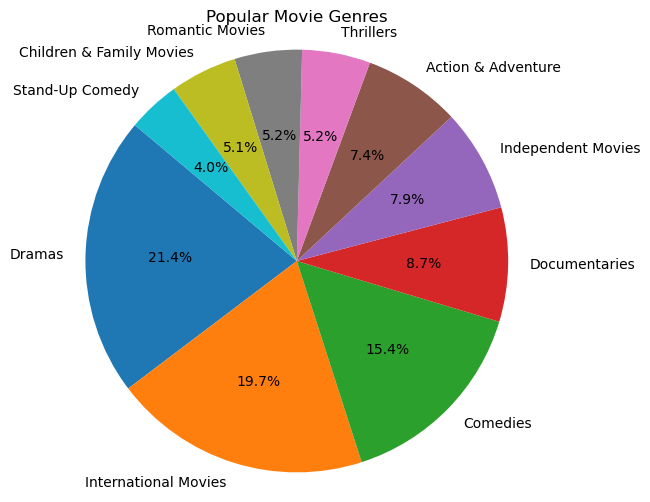

In [9]:
# Extracting top 10 movie genres
Top_10_Movie_Genre = Movies_list_df.sum().sort_values(ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(6, 6))

# Plotting the pie chart
Top_10_Movie_Genre.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Popular Movie Genres')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


In [10]:
#Pie Chart: TV Shows: Popular Genre

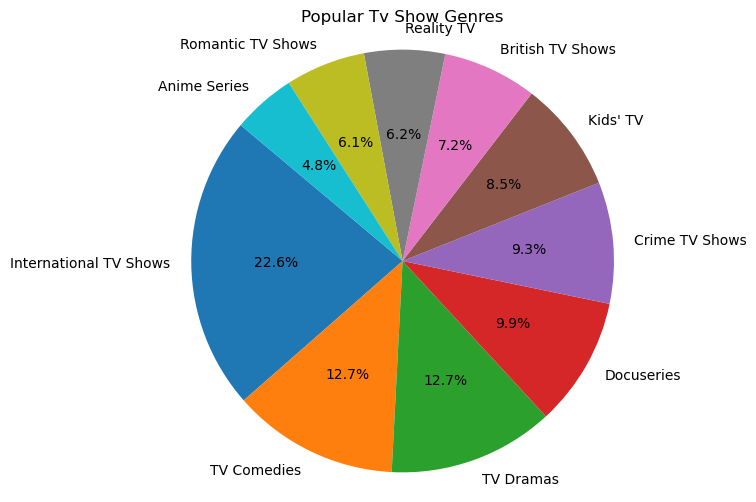

In [11]:
# Extracting top 10 movie genres
Top_10_TV_Genre = tv_list_df.sum().sort_values(ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(6, 6))

# Plotting the pie chart
Top_10_TV_Genre.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Popular Tv Show Genres')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()